# Crop Recommendation

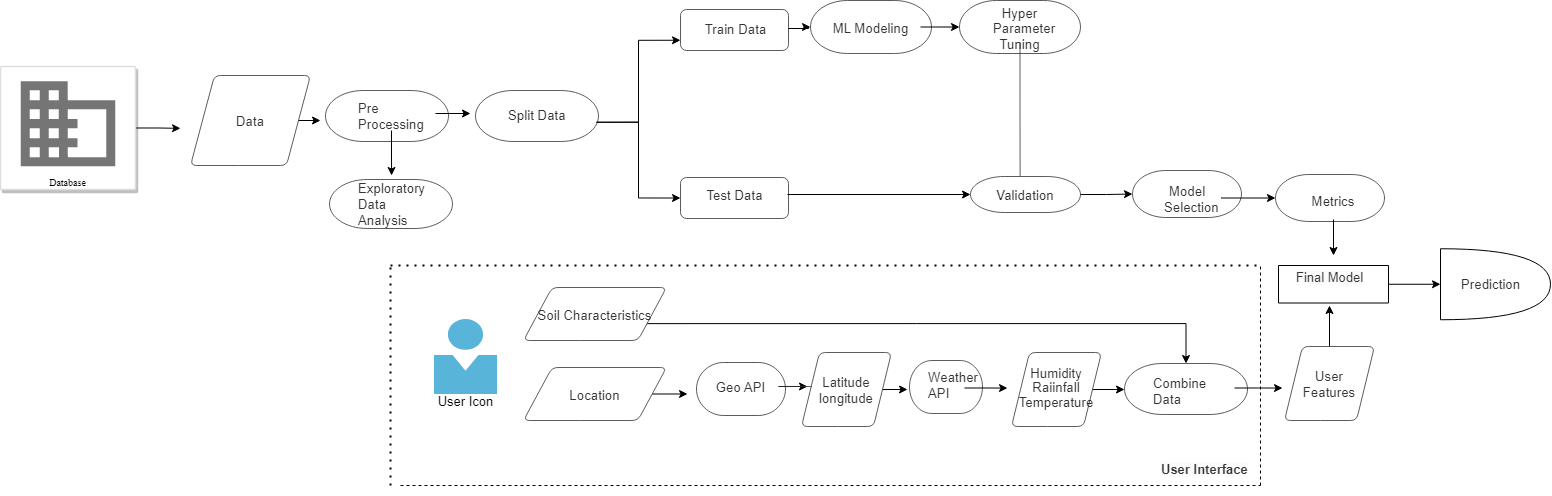

In [1]:
from IPython import display
display.Image("/Users/manoj/Desktop/Sem-5/Capstone/Project/Notebooks/flowchart.png")

### Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle

In [3]:
# Importing the Data

crop_df = pd.read_csv("/Users/manoj/Desktop/Sem-5/Capstone/Project/Data/crop_data.csv")
fert_df = pd.read_csv("/Users/manoj/Desktop/Sem-5/Capstone/Project/Data/fertilize_data.csv")
final_df = pd.read_csv("/Users/manoj/Desktop/Sem-5/Capstone/Project/Data/Crop_recommendation.csv")

In [4]:
crop_df

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [5]:
fert_df = fert_df.drop(['Unnamed: 0'],axis=1)

In [6]:
fert_df

,Crop,N,P,K,pH
0,Rice,80,40,40,5.50
1,Jowar(Sorghum),80,40,40,5.50
2,Barley(JAV),70,40,45,5.50
3,Maize,80,40,20,5.50
4,Ragi( naachnnii),50,40,20,5.50
...,...,...,...,...,...
1838,Lemon Grass,25,40,40,5.32
1839,Cotton,120,40,20,5.32
1840,Jute,80,40,40,5.32
1841,Coffee,100,20,30,5.32


### Data Preprocessing

In [7]:
crop_df['label'].unique()

array(['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [8]:
fert_df['Crop'].unique()

array(['Rice', 'Jowar(Sorghum)', 'Barley(JAV)', 'Maize',
       'Ragi( naachnnii)', 'Chickpeas(Channa)', 'French Beans(Farasbi)',
       'Fava beans (Papdi - Val)', 'Lima beans(Pavta)',
       'Cluster Beans(Gavar)', 'Soyabean', 'Black eyed beans( chawli)',
       'Kidney beans', 'pigeon peas(Toor Dal)', 'Moth bean(Matki)',
       'Mung beans', 'Green Peas', 'Horse Gram(kulthi)', 'Black Gram',
       'Rapeseed (Mohri)', 'Coriander seeds', 'Mustard seeds',
       'sesame seed', 'Cumin seeds', 'Lentils(Masoor Dal)', 'Brinjal',
       'Beetroot', 'Bitter Gourd', 'Bottle Gourd', 'Capsicum', 'Cabbage',
       'Carrot', 'Cauliflower', 'Cucumber', 'Coriander leaves',
       'Curry leaves', 'Drumstick – moringa', 'Chili', 'Lady Finger',
       'Mushroom', 'Onion', 'Potato', 'Pumpkin', 'Radish', 'Olive',
       'Sweet Potato', 'Fenugreek Leaf(methi)', 'Spinach', 'Ridgegourd',
       'Gooseberry(Amla)', 'Jambun(Syzygium cumini)',
       'Ziziphus mauritiana(Bor)', 'Garcinia indica(kokam)', 'Tama

In [9]:
# Converting into Lower Case

def lower_case(x):
    x = x.replace(" ", "")
    x = x.lower()
    return x

In [10]:
crop_df['label'] = crop_df['label'].apply(lower_case)
fert_df['Crop'] = fert_df['Crop'].apply(lower_case)

In [11]:
crop_df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
fert_df.head()

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
1,jowar(sorghum),80,40,40,5.5
2,barley(jav),70,40,45,5.5
3,maize,80,40,20,5.5
4,ragi(naachnnii),50,40,20,5.5


In [13]:
crop_df['label'].unique()

array(['rice', 'wheat', 'mungbean', 'tea', 'millet', 'maize', 'lentil',
       'jute', 'coffee', 'cotton', 'groundnut', 'peas', 'rubber',
       'sugarcane', 'tobacco', 'kidneybeans', 'mothbeans', 'coconut',
       'blackgram', 'adzukibeans', 'pigeonpeas', 'chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [14]:
fert_df['Crop'].unique()

array(['rice', 'jowar(sorghum)', 'barley(jav)', 'maize',
       'ragi(naachnnii)', 'chickpeas(channa)', 'frenchbeans(farasbi)',
       'favabeans(papdi-val)', 'limabeans(pavta)', 'clusterbeans(gavar)',
       'soyabean', 'blackeyedbeans(chawli)', 'kidneybeans',
       'pigeonpeas(toordal)', 'mothbean(matki)', 'mungbeans', 'greenpeas',
       'horsegram(kulthi)', 'blackgram', 'rapeseed(mohri)',
       'corianderseeds', 'mustardseeds', 'sesameseed', 'cuminseeds',
       'lentils(masoordal)', 'brinjal', 'beetroot', 'bittergourd',
       'bottlegourd', 'capsicum', 'cabbage', 'carrot', 'cauliflower',
       'cucumber', 'corianderleaves', 'curryleaves', 'drumstick–moringa',
       'chili', 'ladyfinger', 'mushroom', 'onion', 'potato', 'pumpkin',
       'radish', 'olive', 'sweetpotato', 'fenugreekleaf(methi)',
       'spinach', 'ridgegourd', 'gooseberry(amla)',
       'jambun(syzygiumcumini)', 'ziziphusmauritiana(bor)',
       'garciniaindica(kokam)', 'tamarind', 'tapioca(suran)', 'garlic',
  

In [15]:
crop_df['label'] = crop_df['label'].str.replace(r"\(.*?\)", "", regex=True)

In [16]:
fert_df['Crop'] = fert_df['Crop'].str.replace(r"\(.*?\)", "", regex=True)

In [17]:
crop_df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [18]:
fert_df.head()

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
1,jowar,80,40,40,5.5
2,barley,70,40,45,5.5
3,maize,80,40,20,5.5
4,ragi,50,40,20,5.5


### Exploratory Data Analysis (EDA)

We created a pivot table using the data in the "final_df" dataframe. The pivot table will have the "label" column as its index and will calculate the mean value of all other columns in the dataframe for each unique value in the "label" column. The result will be a new dataframe with the "label" values as the row indices and the mean values of the other columns as the table values.

In [19]:
crop_summary = pd.pivot_table(final_df,index=['label'],aggfunc='mean')

In [20]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [21]:
# Comparison between rainfall,temperature,humidity from a crop

fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"],title="Comparison between rainfall,temperature and humidity")
fig.update_layout(plot_bgcolor='white',height=500)
fig.show()

In [22]:
# Temperature vs Humidity Plot

crop_scatter =final_df[(final_df['label']=='rice') | 
                      (final_df['label']=='jute') | 
                      (final_df['label']=='cotton') |
                     (final_df['label']=='maize') |
                     (final_df['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label", title="Temperature vs Humidity")
fig.update_layout(plot_bgcolor='white')
fig.show()

In [23]:
# Sumarry of nutrients required by each crop
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=3, cols=2)

# Filtering top 10 nitrogen requiring crops

top_N = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

# Filtering last 10 nitrogen requiring crops

last_N = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

# Filtering top 10 phosporus requiring crops

top_P = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

# Filtering last 10 phosporus requiring crops

last_P = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

# Filtering top 10 potassium requiring crops

top_K = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

# Filtering last 10 potassium requiring crops

last_K = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}


# plotting top 10 nitrogen requiring crops

fig.add_trace(
    go.Bar(top_N,
           name="Crops which reqiure more nitrogen",
           orientation='h',
           marker_color='#00688b',
          text=top_N['x']),
          
    
    row=1, col=1
)

# Plotting last 10 nitrogen requiring crops

fig.add_trace(
    go.Bar(last_N,
           name="Crops that require less nitrogen",
           orientation='h',
           marker_color='#8deeee',
          text=last_N['x']),
    row=1, col=2
)

# plotting top 10 phosporous requiring crops

fig.add_trace(
    go.Bar(top_P,
           name="Crops which reqiure more phosphorus",
           orientation='h',
           marker_color='#698b69',
          text=top_P['x']),
    
    row=2, col=1
)

# Plotting last 10 phosphorous requiring crops

fig.add_trace(
    go.Bar(last_P,
           name="Crops that require less phosphorus",
           orientation='h',
           marker_color='#b4eeb4',
          text=last_P['x']),
    row=2, col=2
)


# plotting top 10 potassium requiring crops

fig.add_trace(
    go.Bar(top_K,
           name="Crops which reqiure more potassium",
           orientation='h',
           marker_color='#893f45',
          text=top_K['x']),
    
    row=3, col=1
)

# Plotting last 10 potassium requiring crops

fig.add_trace(
    go.Bar(last_K,
           name="Crops that require less potassium",
           orientation='h',
           marker_color='#f88379',
          text=last_K['x']),
    row=3, col=2
)

#fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="N,P,K Values",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=1000)



fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [24]:
fig = go.Figure()

# Plotting nitrogen levels

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='#00688b'
))
# Plotting phosphorus levels

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='#698b69'
))

# Plotting pottasium levels

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='#893f45'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [25]:
# Below are the crops that would be best suitable for a specific season

print("Summer Crops")
print(final_df[(final_df['temperature'] > 30) & (final_df['humidity'] > 50)]['label'].unique())
print("Winter Crops")
print(final_df[(final_df['temperature'] < 20) & (final_df['humidity'] > 30)]['label'].unique())
print("Rainy Crops")
print(final_df[(final_df['rainfall'] > 200) & (final_df['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops
['rice' 'papaya' 'coconut']


### Train and Split Data

In [26]:
#Seperating the features and the target variable

X = final_df[['N','P','K','temperature','humidity','ph','rainfall']]
y = final_df['label']

In [27]:
# Split dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Model Implementation

#### 1. Decision Tree

In [28]:
dt = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [29]:
dt_acc = round(metrics.accuracy_score(y_test, y_pred_dt)*100,2)
dt_precision = round(precision_score(y_test, y_pred_dt,average='weighted')*100,2)
dt_recall = round(recall_score(y_test, y_pred_dt,average='weighted')*100,2)
dt_f1 = round(f1_score(y_test, y_pred_dt,average='weighted')*100,2)

print("DecisionTrees's Accuracy is: ", dt_acc)
print('Precision: ',dt_precision)
print('Recall: ',dt_recall)
print('F1 Score:',dt_f1)

DecisionTrees's Accuracy is:  97.73
Precision:  97.8
Recall:  97.73
F1 Score: 97.71


#### 2. Random Forest

In [30]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [31]:
rf_acc = round(metrics.accuracy_score(y_test, y_pred_rf)*100,2)
rf_precision = round(precision_score(y_test, y_pred_rf,average='weighted')*100,2)
rf_recall = round(recall_score(y_test, y_pred_rf,average='weighted')*100,2)
rf_f1 = round(f1_score(y_test, y_pred_rf,average='weighted')*100,2)

print("Random Forest Accuracy is: ", rf_acc)
print('Precision: ',rf_precision)
print('Recall: ',rf_recall)
print('F1 Score:',rf_f1)

Random Forest Accuracy is:  99.32
Precision:  99.37
Recall:  99.32
F1 Score: 99.32


#### 3. Support Vector Machine (SVM)

In [32]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [33]:
svc = svm.SVC(kernel='poly', degree=3, C=1)
svc.fit(X_train_norm,y_train)
y_pred_svc = svc.predict(X_test_norm)

In [34]:
svc_acc = round(metrics.accuracy_score(y_test, y_pred_svc)*100,2)
svc_precision = round(precision_score(y_test, y_pred_svc,average='weighted')*100,2)
svc_recall = round(recall_score(y_test, y_pred_svc,average='weighted')*100,2)
svc_f1 = round(f1_score(y_test, y_pred_svc,average='weighted')*100,2)

print("Support Vector Machine (SVM) Accuracy is: ", svc_acc)
print('Precision: ',svc_precision)
print('Recall: ',svc_recall)
print('F1 Score:',svc_f1)

Support Vector Machine (SVM) Accuracy is:  96.36
Precision:  96.63
Recall:  96.36
F1 Score: 96.37


#### 4. Naive Bayes

In [35]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

In [36]:
nb_acc = round(metrics.accuracy_score(y_test, y_pred_nb)*100,2)
nb_precision = round(precision_score(y_test, y_pred_nb,average='weighted')*100,2)
nb_recall = round(recall_score(y_test, y_pred_nb,average='weighted')*100,2)
nb_f1 = round(f1_score(y_test, y_pred_nb,average='weighted')*100,2)

print("Naive Bayes Accuracy is: ", nb_acc)
print('Precision: ',nb_precision)
print('Recall: ',nb_recall)
print('F1 Score:',nb_f1)

Naive Bayes Accuracy is:  99.55
Precision:  99.58
Recall:  99.55
F1 Score: 99.54


#### 5. LogisticRegression

In [37]:
lr = LogisticRegression(max_iter=1000) 
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

/Users/manoj/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [38]:
lr_acc = round(metrics.accuracy_score(y_test, y_pred_lr)*100,2)
lr_precision = round(precision_score(y_test, y_pred_lr,average='weighted')*100,2)
lr_recall = round(recall_score(y_test, y_pred_lr,average='weighted')*100,2)
lr_f1 = round(f1_score(y_test, y_pred_lr,average='weighted')*100,2)

print("Logistic Regression Accuracy is: ", lr_acc)
print('Precision: ',lr_precision)
print('Recall: ',lr_recall)
print('F1 Score:',lr_f1)

Logistic Regression Accuracy is:  95.0
Precision:  95.19
Recall:  95.0
F1 Score: 95.02


### Saving every trained model as Pickle Files

In [39]:
# Decision Tree

dt_file = '/Users/manoj/Desktop/Sem-5/Capstone/Project/flask/dt_model.pkl'
dt_model_pkl = open(dt_file, 'wb')
pickle.dump(dt, dt_model_pkl)
dt_model_pkl.close()

In [40]:
# Random Forest

rf_file = '/Users/manoj/Desktop/Sem-5/Capstone/Project/flask/rf_model.pkl'
rf_model_pkl = open(rf_file, 'wb')
pickle.dump(rf, rf_model_pkl)
rf_model_pkl.close()

In [41]:
# SVM

svm_file = '/Users/manoj/Desktop/Sem-5/Capstone/Project/flask/svm_model.pkl'
svm_model_pkl = open(svm_file, 'wb')
pickle.dump(svc, svm_model_pkl)
svm_model_pkl.close()

In [42]:
# Random Forest

nb_file = '/Users/manoj/Desktop/Sem-5/Capstone/Project/flask/nb_model.pkl'
nb_model_pkl = open(nb_file, 'wb')
pickle.dump(nb, nb_model_pkl)
nb_model_pkl.close()

In [43]:
# Random Forest

lr_file = '/Users/manoj/Desktop/Sem-5/Capstone/Project/flask/lr_model.pkl'
lr_model_pkl = open(lr_file, 'wb')
pickle.dump(lr, lr_model_pkl)
lr_model_pkl.close()

### Metrics

In [44]:
metr = pd.DataFrame({'Model':['Decision Tree','Random Forest','Support Vector Machine(SVM)','Naive Bayes','Logistic Regression'],
                    'Accuracy':[dt_acc,rf_acc,svc_acc,nb_acc,lr_acc],
                     'Precision':[dt_precision,rf_precision,svc_precision,nb_precision,lr_precision],
                    'Recall':[dt_recall,rf_recall,svc_recall,nb_recall,lr_recall],
                    'F1 Score':[dt_f1,rf_f1,svc_f1,nb_f1,lr_f1]})

metr

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,97.73,97.80,97.73,97.71
1,Random Forest,99.32,99.37,99.32,99.32
2,Support Vector Machine(SVM),96.36,96.63,96.36,96.37
3,Naive Bayes,99.55,99.58,99.55,99.54
4,Logistic Regression,95.00,95.19,95.00,95.02


In [45]:
fig = px.bar(metr, x='Accuracy', y='Model',orientation='h',color_discrete_sequence=['#26a69a'])

# Set the plot title and axis labels
fig.update_layout(
    title='Accuracies',
    xaxis_title='Category',
    yaxis_title='Value',
)

# Set the plot theme
fig.update_layout(
    template='plotly_dark',
)

# Show the plot
fig.show()

In [46]:
fig = px.bar(metr, x='F1 Score', y='Model',orientation='h',color_discrete_sequence=['#26a69a'])

# Set the plot title and axis labels
fig.update_layout(
    title='F1 Score',
    xaxis_title='Category',
    yaxis_title='Value',
)

# Set the plot theme
fig.update_layout(
    template='plotly_dark',
)

# Show the plot
fig.show()

In [47]:
fig = px.bar(metr, x='Precision', y='Model',orientation='h',color_discrete_sequence=['#26a69a'])

# Set the plot title and axis labels
fig.update_layout(
    title='Precision',
    xaxis_title='Category',
    yaxis_title='Value',
)

# Set the plot theme
fig.update_layout(
    template='plotly_dark',
)

# Show the plot
fig.show()

In [48]:
fig = px.bar(metr, x='Recall', y='Model',orientation='h',color_discrete_sequence=['#26a69a'])

# Set the plot title and axis labels
fig.update_layout(
    title='Recall',
    xaxis_title='Category',
    yaxis_title='Value',
)

# Set the plot theme
fig.update_layout(
    template='plotly_dark',
)

# Show the plot
fig.show()